# Importing Libraries

In [2]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
import numpy as np

sns.set()
from sklearn.model_selection import train_test_split

In [3]:
import plotly.io as pio
pio.renderers.default = 'notebook'


# Download the data

In [15]:
df = pd.read_csv("../data/loan_data_set.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [5]:
df.describe().transpose()

count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         594.0   146.255892    85.485234    9.0   100.0   127.5   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   
Credit_History     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          167.75    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
NUMERICAL_FEATURES = ['ApplicantIncome','LoanAmount','Loan_Amount_Term',]
CATEGORICAL_FEATURES =['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area','Credit_History']

TARGET= 'Loan_Status'

COLUMNS_TO_DROP=["Loan_ID","CoapplicantIncome"]

In [7]:
df["ApplicantIncome"] = df["ApplicantIncome"]+df['CoapplicantIncome']
df[TARGET] = df[TARGET].map({"Y": 1, "N": 0})


df = df.drop(COLUMNS_TO_DROP,axis=1)


In [12]:
df

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No           5849.0   
1      Male     Yes          1      Graduate            No           6091.0   
2      Male     Yes          0      Graduate           Yes           3000.0   
3      Male     Yes          0  Not Graduate            No           4941.0   
4      Male      No          0      Graduate            No           6000.0   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No           2900.0   
610    Male     Yes         3+      Graduate            No           4106.0   
611    Male     Yes          1      Graduate            No           8312.0   
612    Male     Yes          2      Graduate            No           7583.0   
613  Female      No          0      Graduate           Yes           4583.0   

     LoanAmount  Loan_Amount_Term  Credit_History Property_Area  Loan_Status  
0           NaN             360.0             1.0         Urban            1  
1         128.0             360.0             1.0         Rural            0  
2          66.0             360.0             1.0         Urban            1  
3         120.0             360.0             1.0         Urban            1  
4         141.0             360.0             1.0         Urban            1  
..          ...               ...             ...           ...          ...  
609        71.0             360.0             1.0         Rural            1  
610        40.0             180.0             1.0         Rural            1  
611       253.0             360.0             1.0         Urban            1  
612       187.0             360.0             1.0         Urban            1  
613       133.0             360.0             0.0     Semiurban            0  

[614 rows x 11 columns]

In [13]:
df.isnull().sum()   #checking missing Values

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.describe(include="all").transpose()

count unique        top freq         mean          std  \
Gender              601      2       Male  489          NaN          NaN   
Married             611      2        Yes  398          NaN          NaN   
Dependents          599      4          0  345          NaN          NaN   
Education           614      2   Graduate  480          NaN          NaN   
Self_Employed       582      2         No  500          NaN          NaN   
ApplicantIncome   614.0    NaN        NaN  NaN  7024.705081  6458.663872   
LoanAmount        592.0    NaN        NaN  NaN   146.412162    85.587325   
Loan_Amount_Term  600.0    NaN        NaN  NaN        342.0     65.12041   
Credit_History    564.0    NaN        NaN  NaN     0.842199     0.364878   
Property_Area       614      3  Semiurban  233          NaN          NaN   
Loan_Status       614.0    NaN        NaN  NaN     0.687296     0.463973   

                     min     25%     50%      75%      max  
Gender               NaN     NaN     NaN      NaN      NaN  
Married              NaN     NaN     NaN      NaN      NaN  
Dependents           NaN     NaN     NaN      NaN      NaN  
Education            NaN     NaN     NaN      NaN      NaN  
Self_Employed        NaN     NaN     NaN      NaN      NaN  
ApplicantIncome   1442.0  4166.0  5416.5  7521.75  81000.0  
LoanAmount           9.0   100.0   128.0    168.0    700.0  
Loan_Amount_Term    12.0   360.0   360.0    360.0    480.0  
Credit_History       0.0     1.0     1.0      1.0      1.0  
Property_Area        NaN     NaN     NaN      NaN      NaN  
Loan_Status          0.0     0.0     1.0      1.0      1.0

In [8]:
# filling with mode for categorical variables
for column in CATEGORICAL_FEATURES:
    df[column].fillna(df[column].mode()[0], inplace=True)

# filling with median for numerical variables
for column in NUMERICAL_FEATURES:
    df[column].fillna(df[column].median(), inplace=True)

# Filling missing values in the label column
df[TARGET] = df[TARGET].fillna(df[TARGET].median())


In [9]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(int)

In [17]:
df.isnull().sum() #rechecking missing values

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [18]:
df.describe(include="all").transpose() #dataframe description

count unique        top freq         mean          std  \
Gender              614      2       Male  502          NaN          NaN   
Married             614      2        Yes  401          NaN          NaN   
Dependents        614.0    NaN        NaN  NaN       0.7443     1.009623   
Education           614      2   Graduate  480          NaN          NaN   
Self_Employed       614      2         No  532          NaN          NaN   
ApplicantIncome   614.0    NaN        NaN  NaN  7024.705081  6458.663872   
LoanAmount        614.0    NaN        NaN  NaN   145.752443    84.107233   
Loan_Amount_Term  614.0    NaN        NaN  NaN   342.410423    64.428629   
Credit_History    614.0    NaN        NaN  NaN     0.855049     0.352339   
Property_Area       614      3  Semiurban  233          NaN          NaN   
Loan_Status       614.0    NaN        NaN  NaN     0.687296     0.463973   

                     min     25%     50%      75%      max  
Gender               NaN     NaN     NaN      NaN      NaN  
Married              NaN     NaN     NaN      NaN      NaN  
Dependents           0.0     0.0     0.0      1.0      3.0  
Education            NaN     NaN     NaN      NaN      NaN  
Self_Employed        NaN     NaN     NaN      NaN      NaN  
ApplicantIncome   1442.0  4166.0  5416.5  7521.75  81000.0  
LoanAmount           9.0  100.25   128.0   164.75    700.0  
Loan_Amount_Term    12.0   360.0   360.0    360.0    480.0  
Credit_History       0.0     1.0     1.0      1.0      1.0  
Property_Area        NaN     NaN     NaN      NaN      NaN  
Loan_Status          0.0     0.0     1.0      1.0      1.0

In [19]:
df.Gender.value_counts() # Checking gender distribution for potential biases

Gender
Male      502
Female    112
Name: count, dtype: int64

In [20]:
df.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])

In [22]:
df

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0           5849.0   
1         1        1           1          0              0           6091.0   
2         1        1           0          0              1           3000.0   
3         1        1           0          1              0           4941.0   
4         1        0           0          0              0           6000.0   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0           2900.0   
610       1        1           3          0              0           4106.0   
611       1        1           1          0              0           8312.0   
612       1        1           2          0              0           7583.0   
613       0        0           0          0              1           4583.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
0         128.0             360.0             1.0              2            1  
1         128.0             360.0             1.0              0            0  
2          66.0             360.0             1.0              2            1  
3         120.0             360.0             1.0              2            1  
4         141.0             360.0             1.0              2            1  
..          ...               ...             ...            ...          ...  
609        71.0             360.0             1.0              0            1  
610        40.0             180.0             1.0              0            1  
611       253.0             360.0             1.0              2            1  
612       187.0             360.0             1.0              2            1  
613       133.0             360.0             0.0              1            0  

[614 rows x 11 columns]

In [23]:
plt.figure(figsize=(1,2))

for feature in CATEGORICAL_FEATURES:
    fig = px.histogram(df, x=feature, color=feature)
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    fig.update_layout(title=feature)
    fig.show()


<Figure size 100x200 with 0 Axes>

### Insight: The dataset exhibits a significant gender disparity, with male applicants comprising 502 applications compared to only 112 from female applicants.

<Figure size 1000x600 with 0 Axes>

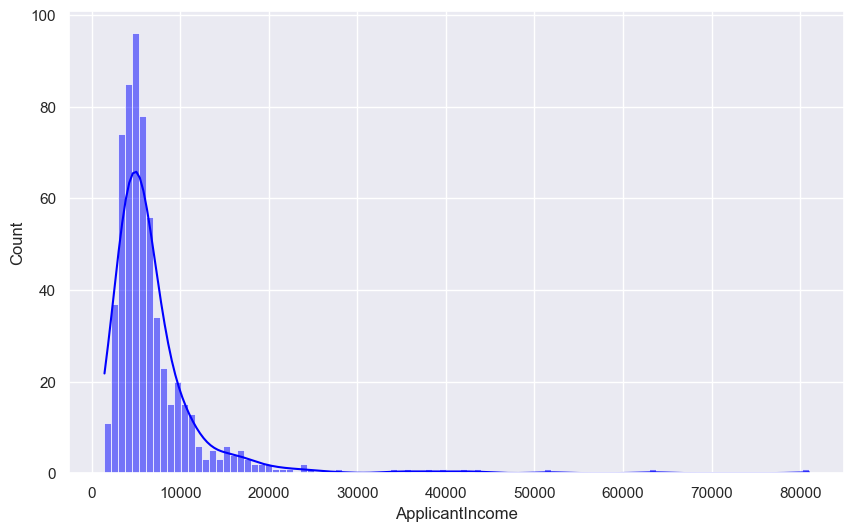

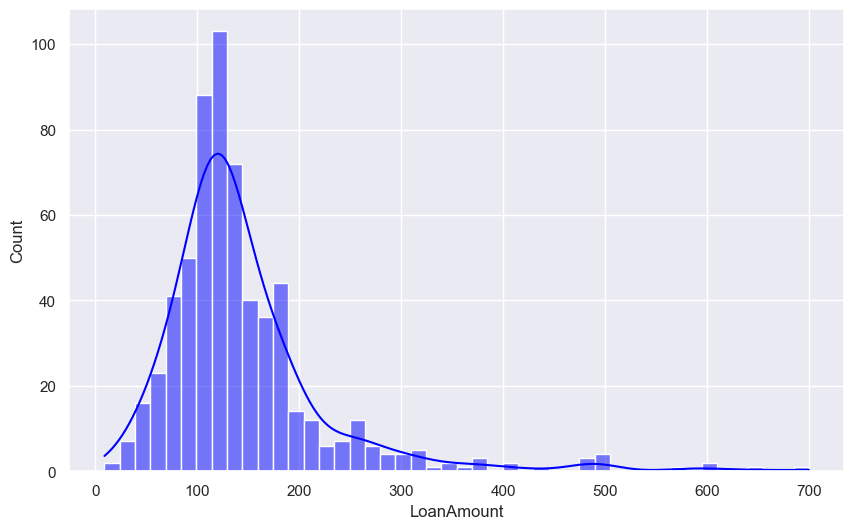

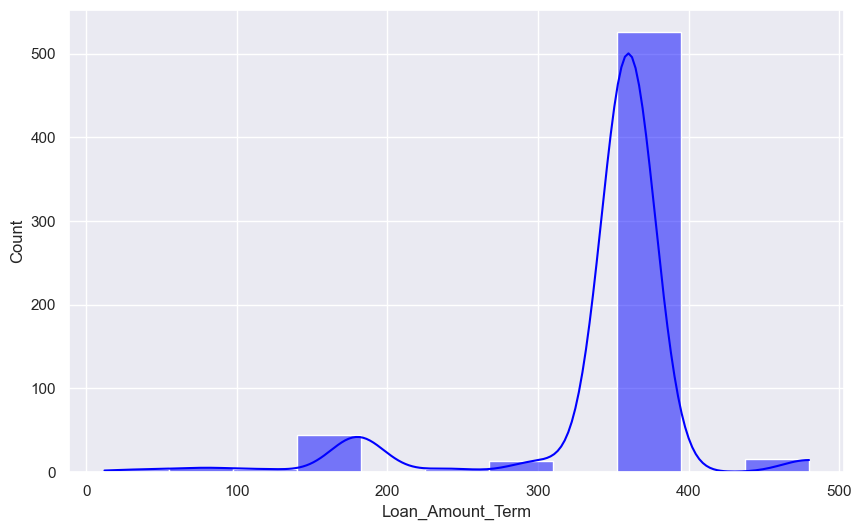

In [24]:
import plotly.figure_factory as ff

plt.figure(figsize=(10,6))

for feature in NUMERICAL_FEATURES:
    plt.figure(figsize=(10,6))
    fig0 = sns.histplot(df[feature], kde=True, color="blue")
    plt.show()

In [25]:
corr=df.corr()
corr

Gender   Married  Dependents  Education  Self_Employed  \
Gender            1.000000  0.364569    0.172914   0.045364      -0.000525   
Married           0.364569  1.000000    0.334216   0.012304       0.004489   
Dependents        0.172914  0.334216    1.000000   0.055752       0.056798   
Education         0.045364  0.012304    0.055752   1.000000      -0.010383   
Self_Employed    -0.000525  0.004489    0.056798  -0.010383       1.000000   
ApplicantIncome   0.093191  0.083319    0.125590  -0.161362       0.113000   
LoanAmount        0.106904  0.146546    0.163103  -0.168759       0.115100   
Loan_Amount_Term -0.074030 -0.100912   -0.103864  -0.073928      -0.033739   
Credit_History    0.009170  0.010938   -0.040160  -0.073658      -0.001550   
Property_Area    -0.025752  0.004257   -0.000244  -0.065243      -0.030860   
Loan_Status       0.017987  0.091478    0.010118  -0.085884      -0.003700   

                  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
Gender                   0.093191    0.106904         -0.074030   
Married                  0.083319    0.146546         -0.100912   
Dependents               0.125590    0.163103         -0.103864   
Education               -0.161362   -0.168759         -0.073928   
Self_Employed            0.113000    0.115100         -0.033739   
ApplicantIncome          1.000000    0.620316         -0.070917   
LoanAmount               0.620316    1.000000          0.036960   
Loan_Amount_Term        -0.070917    0.036960          1.000000   
Credit_History          -0.012563   -0.000607         -0.004705   
Property_Area           -0.004218   -0.046632         -0.076120   
Loan_Status             -0.031271   -0.033214         -0.022549   

                  Credit_History  Property_Area  Loan_Status  
Gender                  0.009170      -0.025752     0.017987  
Married                 0.010938       0.004257     0.091478  
Dependents             -0.040160      -0.000244     0.010118  
Education              -0.073658      -0.065243    -0.085884  
Self_Employed          -0.001550      -0.030860    -0.003700  
ApplicantIncome        -0.012563      -0.004218    -0.031271  
LoanAmount             -0.000607      -0.046632    -0.033214  
Loan_Amount_Term       -0.004705      -0.076120    -0.022549  
Credit_History          1.000000       0.001963     0.540556  
Property_Area           0.001963       1.000000     0.032112  
Loan_Status             0.540556       0.032112     1.000000

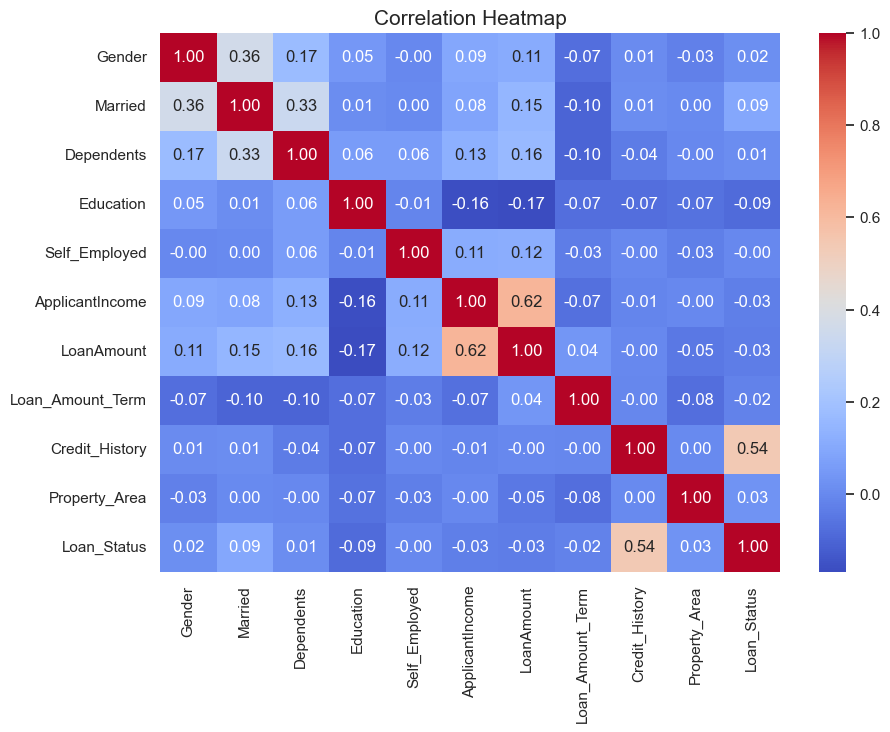

In [26]:
plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [27]:
fig = px.histogram(df, x='LoanAmount',
                   color='Gender',
                   title='Loan Amount and Gender Distribution',
                   opacity=0.8,
                   log_y=False, # represent bars with log scale
                   text_auto=True)
fig.show()

In [28]:
fig = px.box(df, x="Education", y="ApplicantIncome",
             notched=True, # used notched shape
             title="Box plot of Education and Applicant Income",
            )
fig.show()

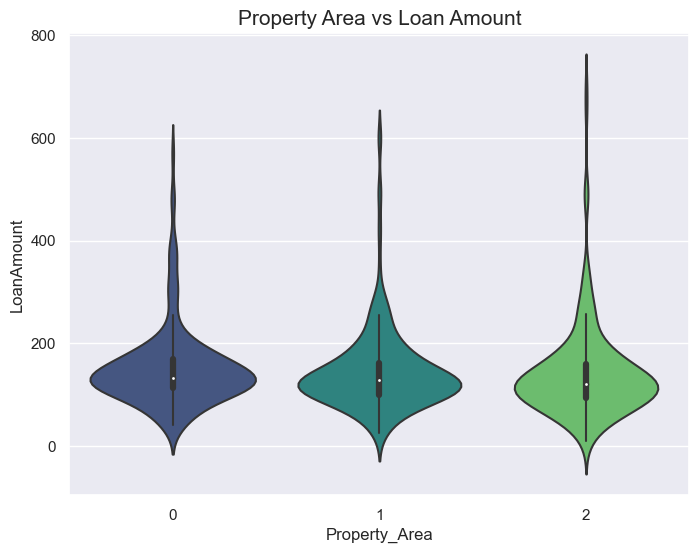

In [29]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Property_Area', y='LoanAmount', data=df, palette='viridis')
plt.title('Property Area vs Loan Amount', fontsize=15)
plt.show()

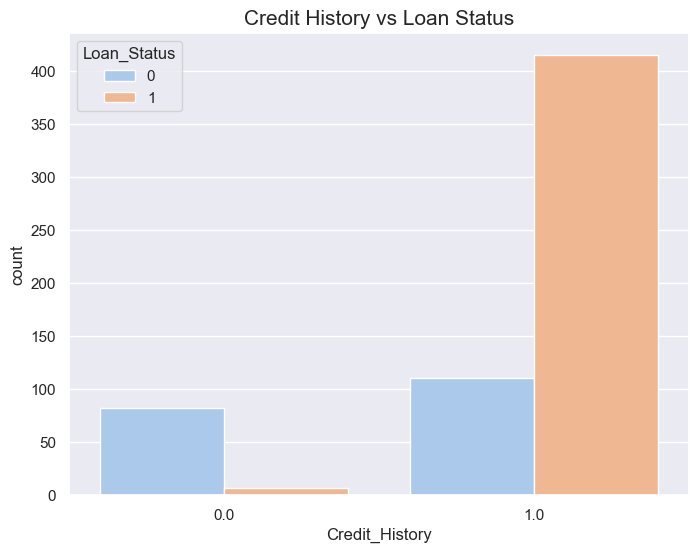

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='pastel')
plt.title('Credit History vs Loan Status', fontsize=15)
plt.show()

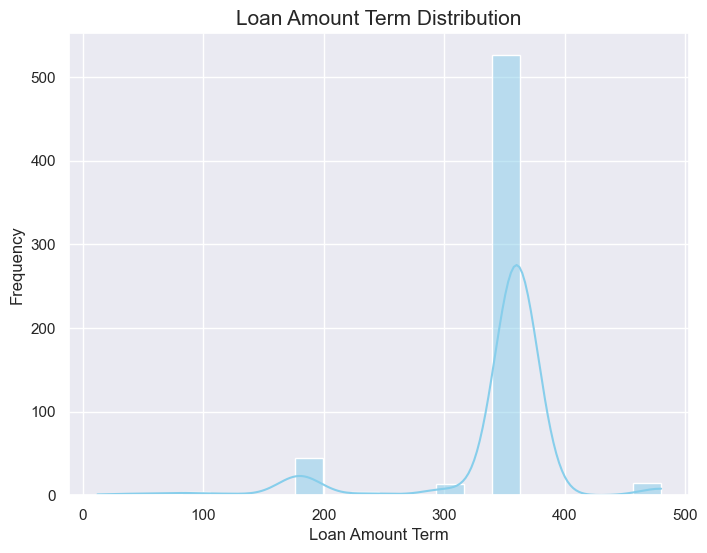

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(df['Loan_Amount_Term'], bins=20, kde=True, color='skyblue')
plt.title('Loan Amount Term Distribution', fontsize=15)
plt.xlabel('Loan Amount Term', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\vpved\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



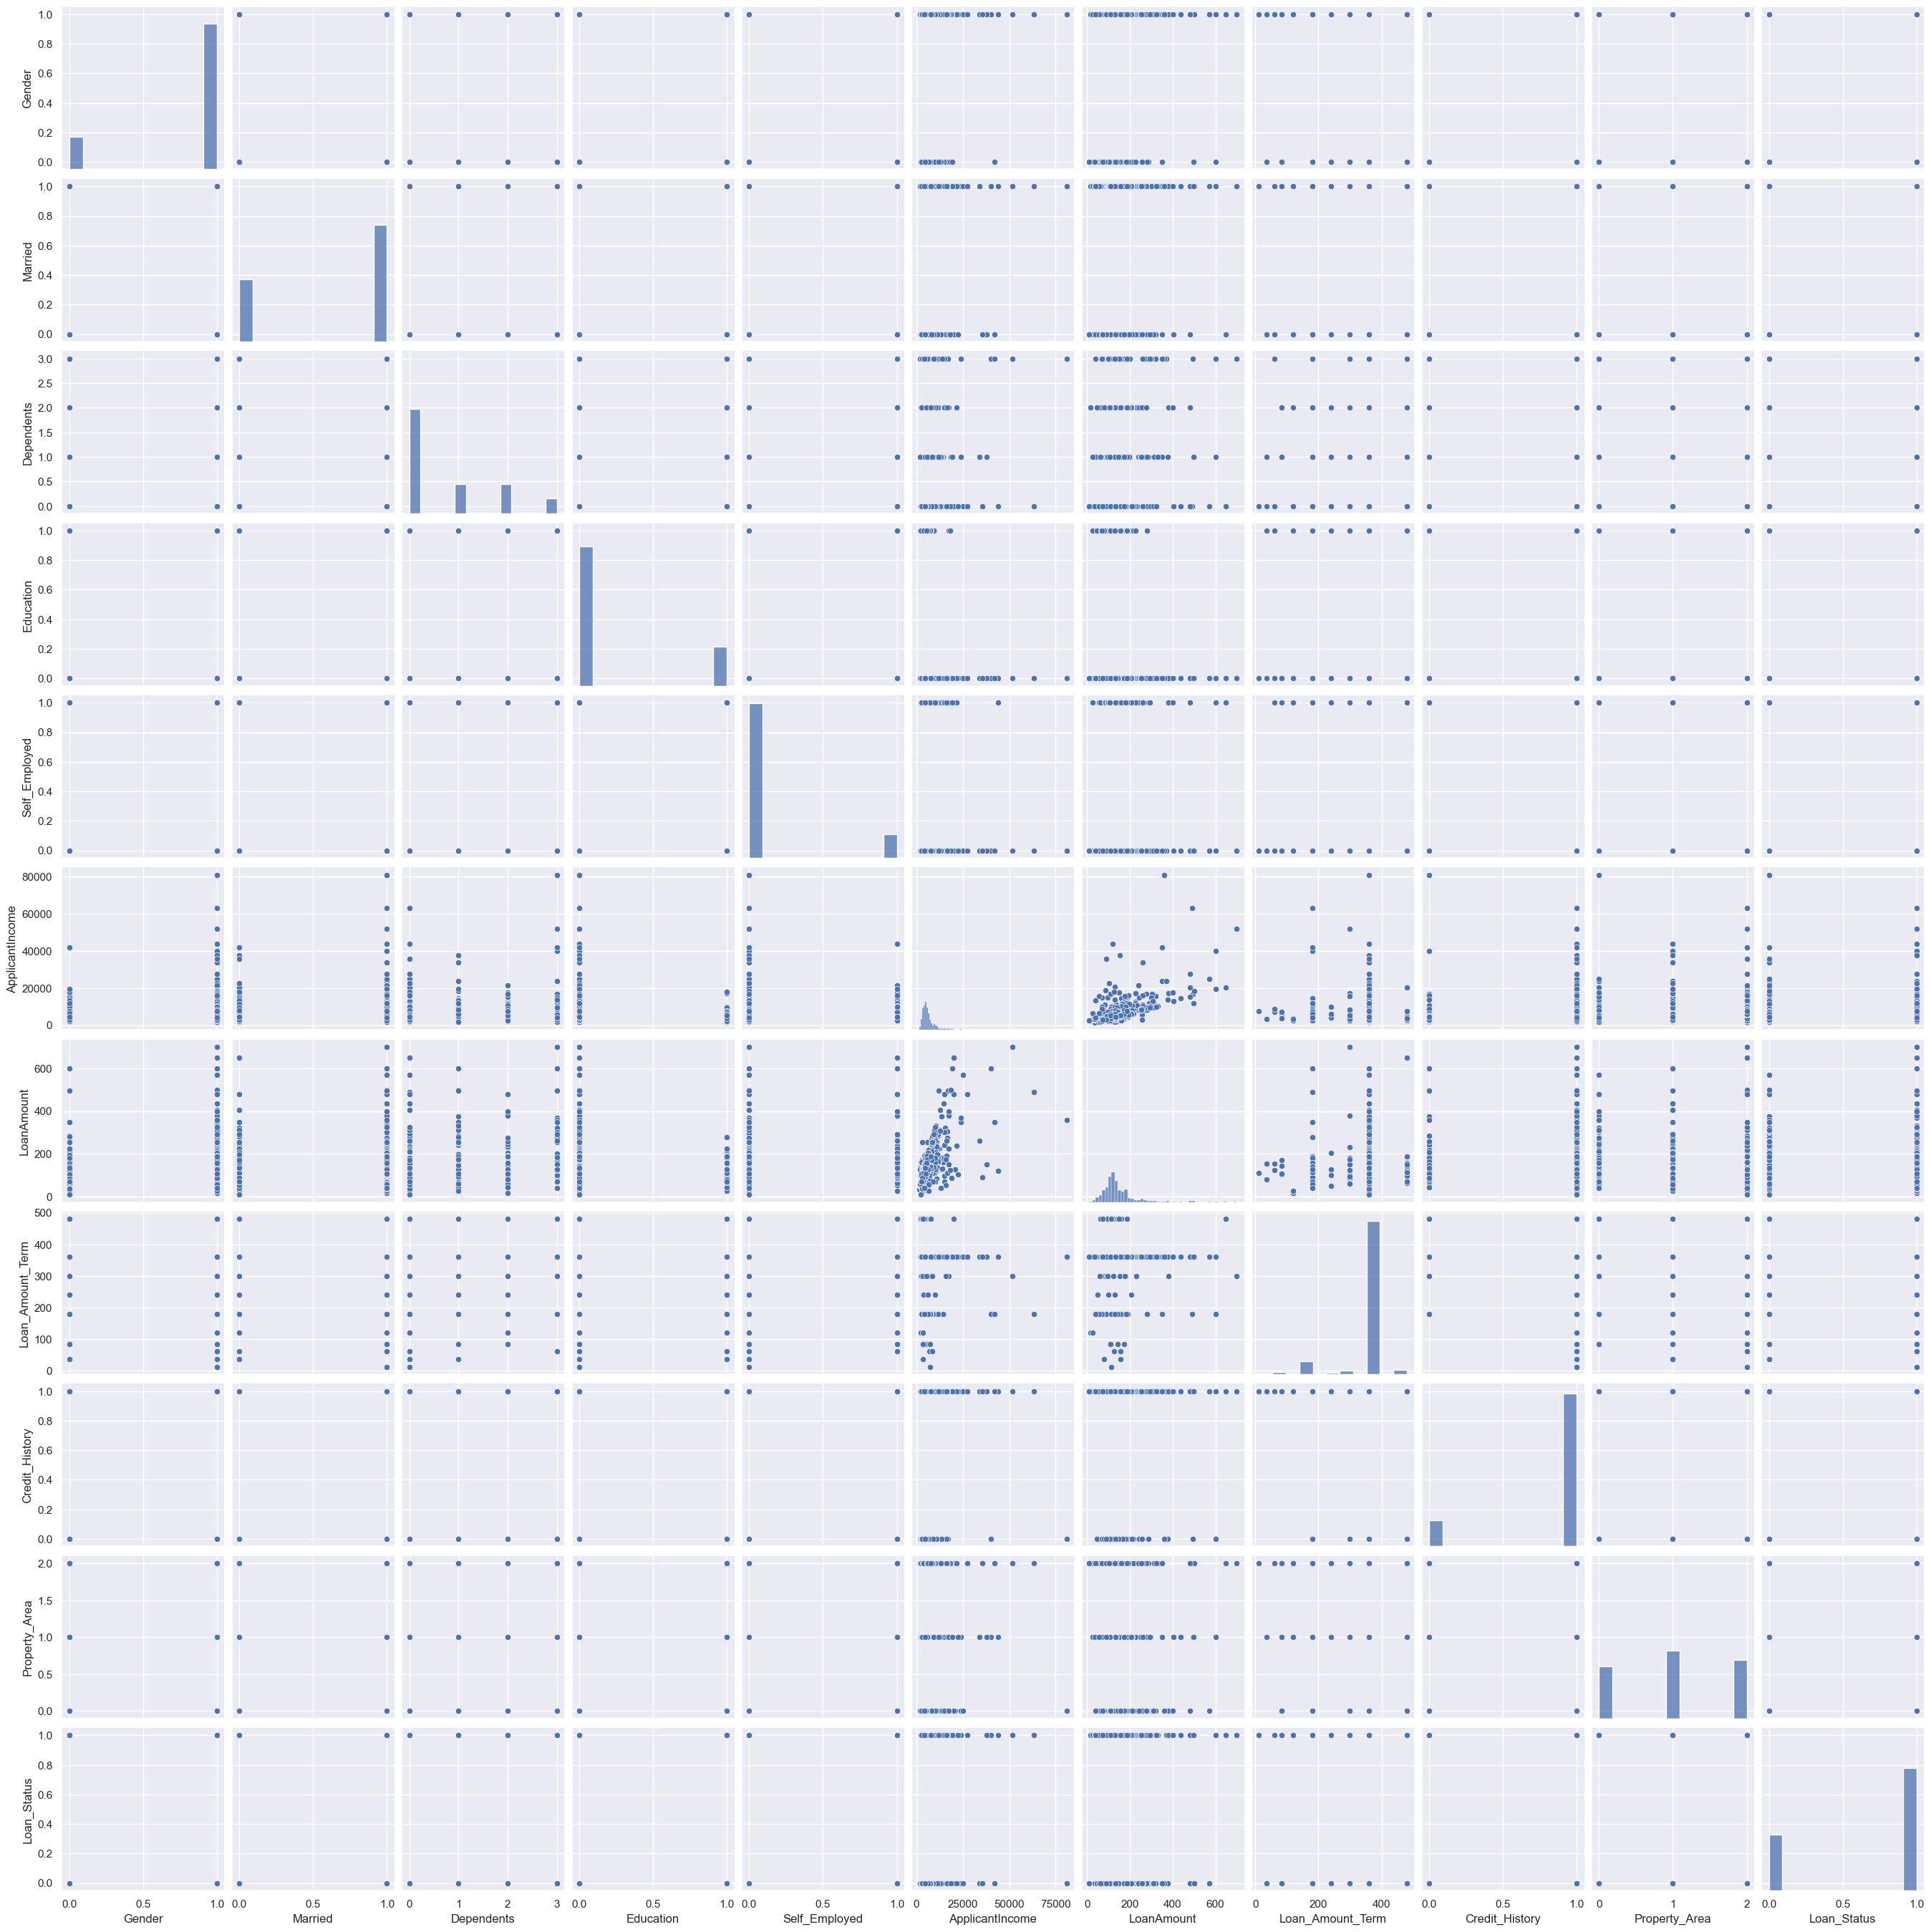

In [32]:
sns.pairplot(df)
plt.show()

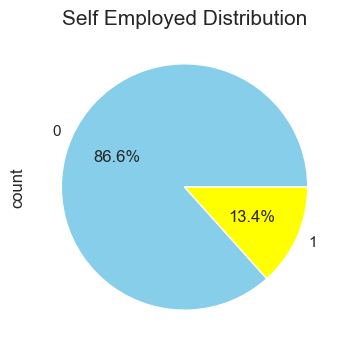

In [33]:
plt.figure(figsize=(6,4))
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'yellow'])
plt.title('Self Employed Distribution', fontsize=15)
plt.show()

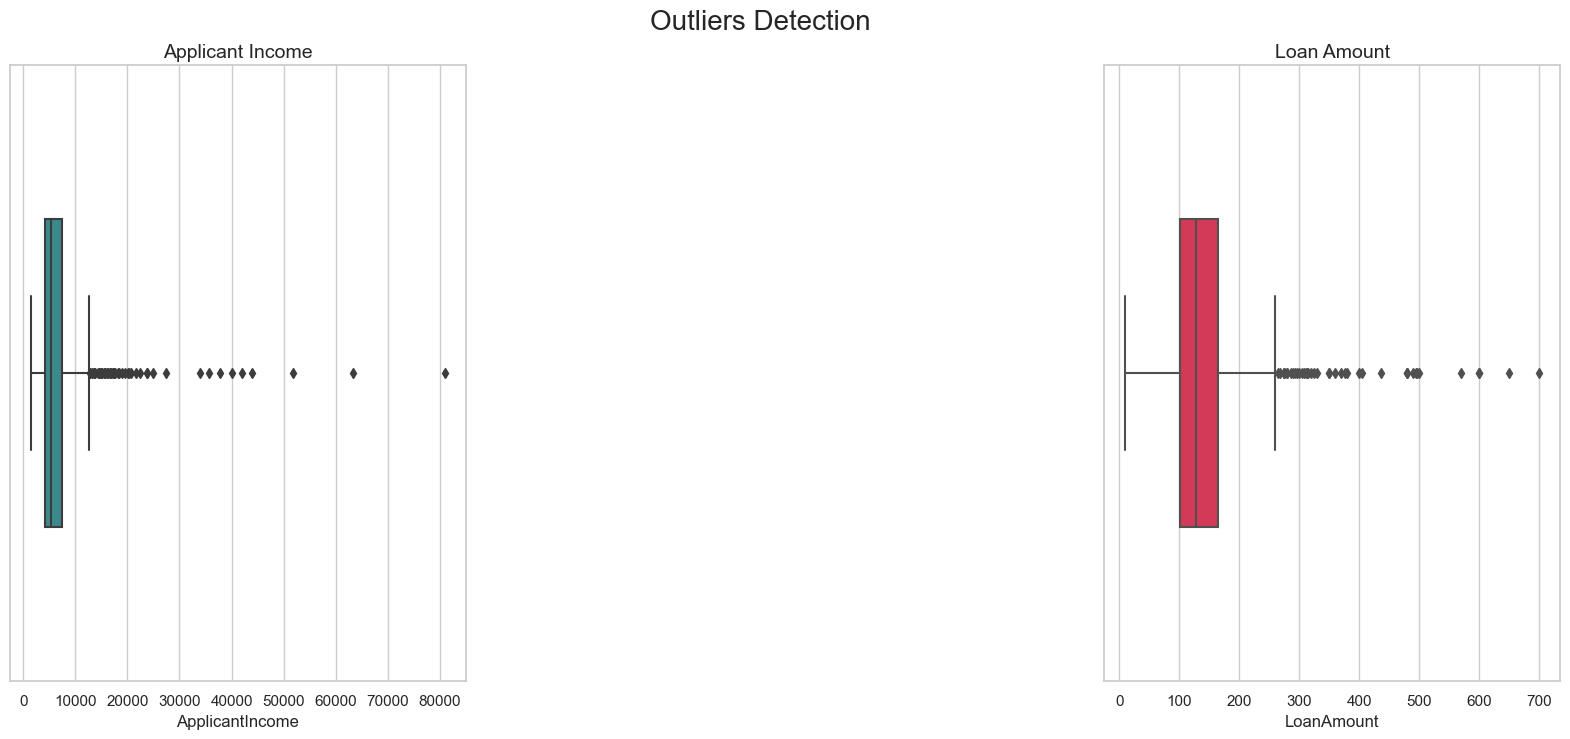

In [34]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")

colors = ["#2F9599", "#FEC601", "#EC2049"]

plt.subplot(1,3,1)
sns.boxplot(data=df, x='ApplicantIncome', color=colors[0], width=0.5)
plt.title('Applicant Income', fontsize=14)



plt.subplot(1,3,3)
sns.boxplot(data=df, x='LoanAmount', color=colors[2], width=0.5)
plt.title('Loan Amount', fontsize=14)

plt.suptitle('Outliers Detection', fontsize=20, y=0.95)

plt.show()

In [35]:
print("Before Removing the outliers", df.shape)
df = df[df['ApplicantIncome']<25000]
print("After Removing the outliers", df.shape)

Before Removing the outliers (614, 11)
After Removing the outliers (604, 11)


In [36]:
print("Before Removing the outliers", df.shape)
df = df[df['LoanAmount']<400]
print("After Removing the outliers", df.shape)

Before Removing the outliers (604, 11)
After Removing the outliers (593, 11)


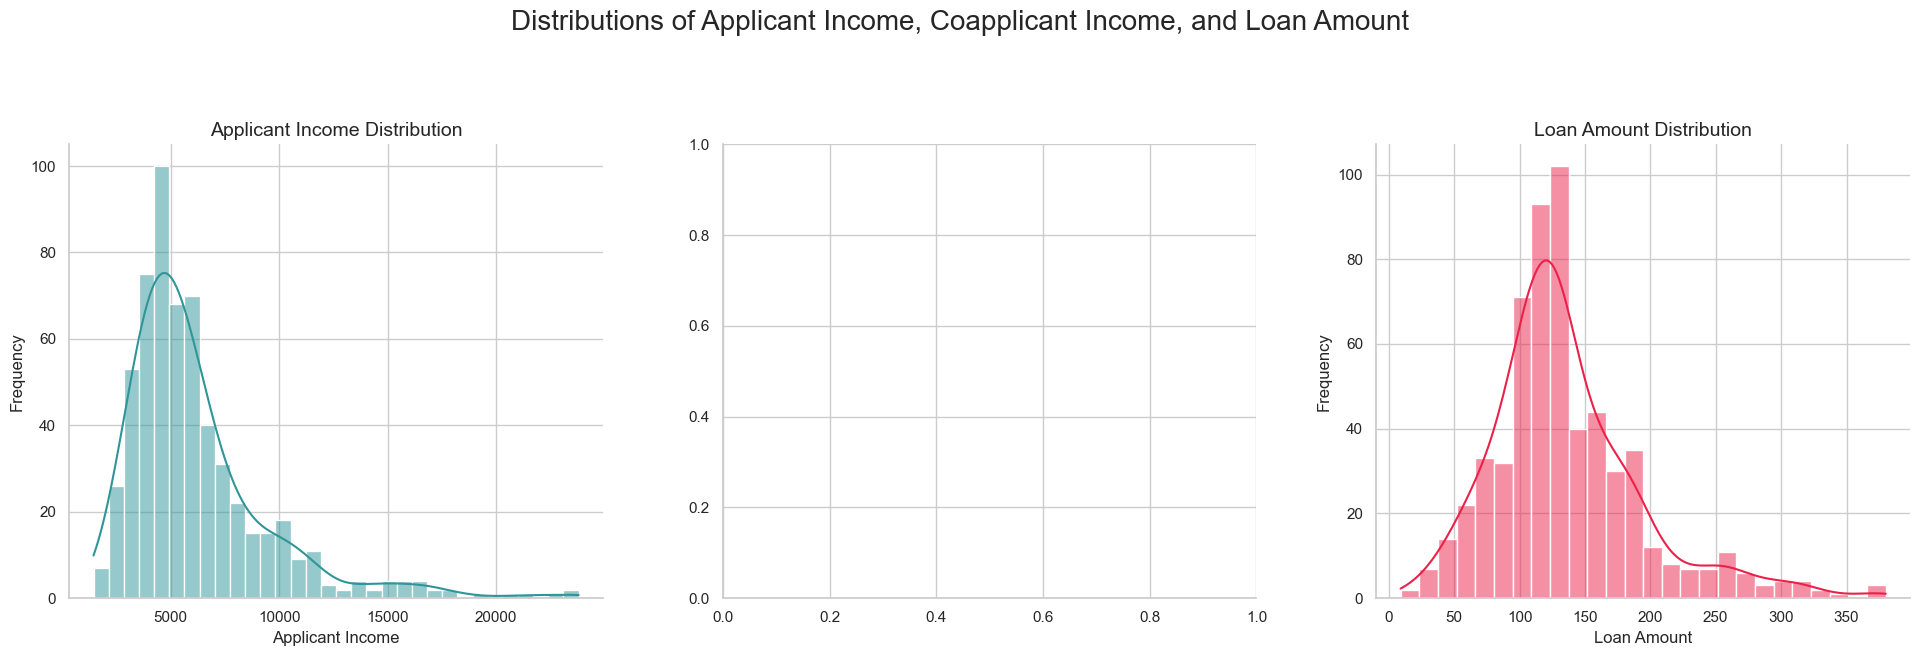

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

colors = ["#2F9599", "#FEC601", "#EC2049"]

sns.histplot(df['ApplicantIncome'], kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Applicant Income Distribution', fontsize=14)
axes[0].set_xlabel('Applicant Income', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)



sns.histplot(df['LoanAmount'], kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Loan Amount Distribution', fontsize=14)
axes[2].set_xlabel('Loan Amount', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distributions of Applicant Income, Coapplicant Income, and Loan Amount', fontsize=20)
plt.tight_layout(pad=3.0)

plt.show()

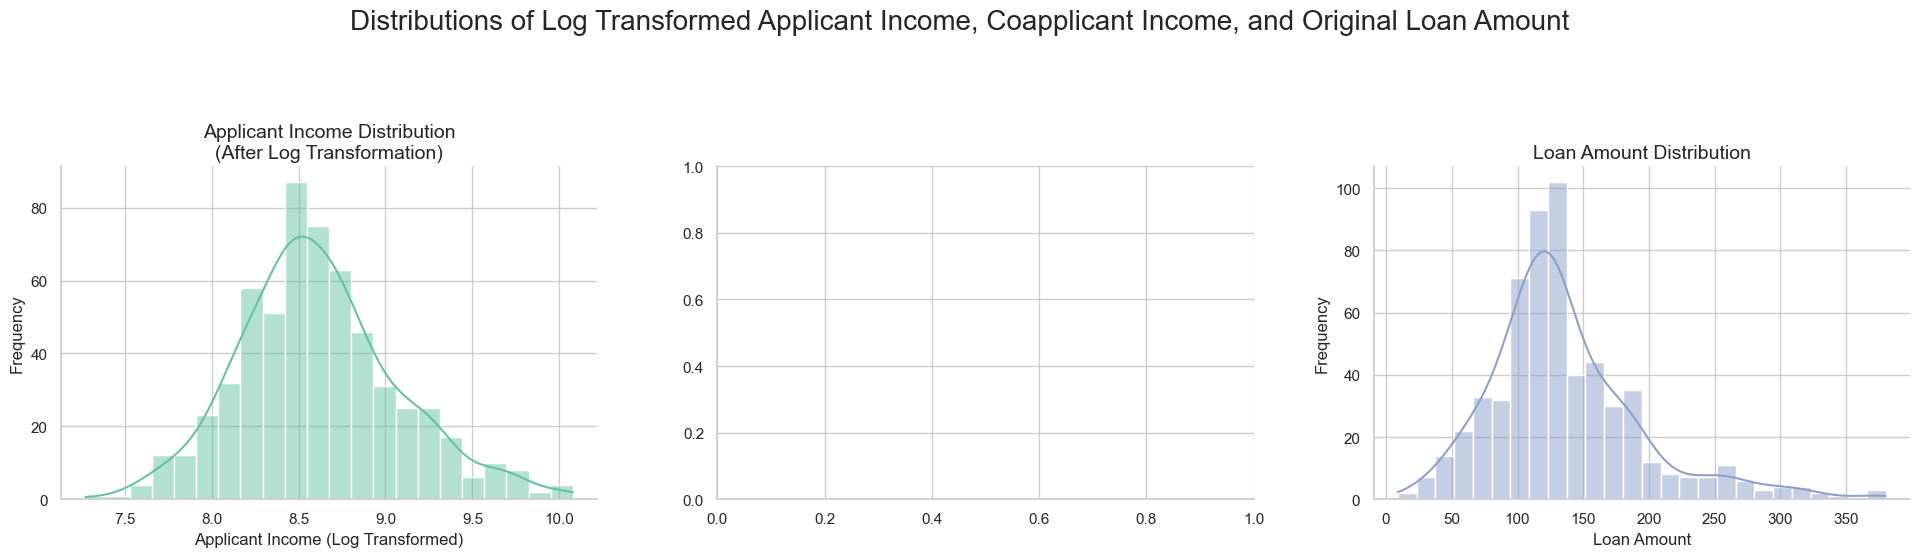

In [38]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

sns.histplot(df['ApplicantIncome'], kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Applicant Income Distribution\n(After Log Transformation)', fontsize=14)
axes[0].set_xlabel('Applicant Income (Log Transformed)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)



sns.histplot(df['LoanAmount'], kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Loan Amount Distribution', fontsize=14)
axes[2].set_xlabel('Loan Amount', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distributions of Log Transformed Applicant Income, Coapplicant Income, and Original Loan Amount', fontsize=20)
plt.tight_layout(pad=3.0)

plt.show()

In [39]:
df.select_dtypes('object').head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

# BUILD Pipeline

In [40]:
# df.drop(COLUMNS_TO_DROP,axis=1, inplace=True)
target = df.drop([TARGET],axis=1)
labelcat = df[TARGET]
Xc_train , Xc_test,yc_train,yc_test = train_test_split(target,labelcat , test_size=0.2, random_state=42,)

for i in [Xc_train , Xc_test,yc_train,yc_test]:
    print(i.shape)



(474, 10)
(119, 10)
(474,)
(119,)


In [41]:
df


Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0         8.674026   
1         1        1           1          0              0         8.714568   
2         1        1           0          0              1         8.006368   
3         1        1           0          1              0         8.505323   
4         1        0           0          0              0         8.699515   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0         7.972466   
610       1        1           3          0              0         8.320205   
611       1        1           1          0              0         9.025456   
612       1        1           2          0              0         8.933664   
613       0        0           0          0              1         8.430109   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
0         128.0             360.0             1.0              2            1  
1         128.0             360.0             1.0              0            0  
2          66.0             360.0             1.0              2            1  
3         120.0             360.0             1.0              2            1  
4         141.0             360.0             1.0              2            1  
..          ...               ...             ...            ...          ...  
609        71.0             360.0             1.0              0            1  
610        40.0             180.0             1.0              0            1  
611       253.0             360.0             1.0              2            1  
612       187.0             360.0             1.0              2            1  
613       133.0             360.0             0.0              1            0  

[593 rows x 11 columns]

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_results(pipeline, X_test=Xc_test, yc_test=yc_test, mtype="reg"):
    """
    Calculate the performance metrics of a pipeline on test data.

    Parameters:
    pipeline (Pipeline): The pipeline to be evaluated.
    X_test (array-like): Test features.
    y_test (array-like): True labels for the test data.
    mtype (str): Model type, 'reg' for regression, 'class' for classification.

    Returns:
    dict: A dictionary containing the pipeline's performance metrics.
    """
    if mtype == 'reg':
        # Predict target values using the pipeline
        y_pred = pipeline.predict(X_test)

        # Calculate regression metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)

        # Get the name of the model
        model_name = type(pipeline.steps[-1][1]).__name__

        return {f"{model_name}": {'MAE': mae, 'MSE': mse, 'R-squared': r_squared}}

    elif mtype == "class":
        X_test=Xc_test
        y_test=yc_test

        # Predict target classes using the pipeline
        y_pred = pipeline.predict(X_test)

        # Calculate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

        f1 = f1_score(y_test, y_pred, average='weighted')

        # Get the name of the model
        model_name = type(pipeline.steps[-1][1]).__name__

        return {f"{model_name}": {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}}

    else:
        raise ValueError("Invalid value for mtype. Use 'reg' for regression or 'class' for classification.")


In [43]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")


#feature scalling
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [44]:
from sklearn.preprocessing import MinMaxScaler , FunctionTransformer

In [45]:
numerical_transformer = Pipeline(steps=[
    ("log_transform", FunctionTransformer(np.log)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ])


    # Create the full pipeline for loan status prediction pipeline
pipe1 = make_pipeline(preprocessor , LogisticRegression())
pipe2 = make_pipeline(preprocessor , RandomForestClassifier())
pipe3 = make_pipeline(preprocessor , DecisionTreeClassifier())


In [46]:
pipe1.fit(Xc_train,yc_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('logisticregression', LogisticRegression())])

In [47]:
pipe2.fit(Xc_train,yc_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [48]:
pipe3.fit(Xc_train,yc_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [49]:
calculate_results(pipe1 ,mtype="class")

{'LogisticRegression': {'Accuracy': 0.8319327731092437,
  'Precision': 0.8503814147018031,
  'Recall': 0.8319327731092437,
  'F1': 0.8097264437689968}}

In [50]:
calculate_results(pipe2,mtype="class")

{'RandomForestClassifier': {'Accuracy': 0.8235294117647058,
  'Precision': 0.8216715257531584,
  'Recall': 0.8235294117647058,
  'F1': 0.8089418777943367}}

In [51]:
calculate_results(pipe3,mtype="class")

{'DecisionTreeClassifier': {'Accuracy': 0.7058823529411765,
  'Precision': 0.7254534083802375,
  'Recall': 0.7058823529411765,
  'F1': 0.7132924335378322}}

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [50, 100, 200, 500],
                     'max_depth' : [5, 10, 15, 20, None],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4]}]

rfc = RandomForestClassifier(random_state=42)

clf = GridSearchCV(rfc, tuned_parameters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

clf.fit(Xc_train, yc_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Detailed classification report:")
y_true, y_pred = yc_test, clf.predict(Xc_test)
print(classification_report(y_true, y_pred))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters set found on development set:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      0.44      0.60        34
           1       0.82      0.99      0.89        85

    accuracy                           0.83       119
   macro avg       0.88      0.71      0.75       119
weighted avg       0.85      0.83      0.81       119



In [5]:
print(pathlib.Path("
                   ").resolve().parent)

NameError: name 'packaging' is not defined

In [2]:
import pathlib